<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part e: CNN DEMO


## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

<p style='color: blue'>Note: Training CNNs takes time, you should expect waiting time to be around 10 ~ 30 mins after running a cell that trains a CNN.</p>

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.


In [1]:
import warnings
warnings.simplefilter('ignore')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
X_train[444].shape

(32, 32, 3)

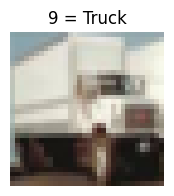

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[444])
plt.axis('off')
plt.title(f"{y_train[444][0]} = Truck")
plt.show()

In [ ]:
y_train.shape

(50000, 1)

In [4]:
to_categorical(y_train, 10).shape

(50000, 10)

In [3]:
n_classes = 10

# 1 categorical colum to 10 categorical columns
y_train = to_categorical(y_train, n_classes)
y_test  = to_categorical(y_test, n_classes)

In [ ]:
# Instead categorical value "9", showing "1" at 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [4]:
# Normalize
X_train = X_train / 255
X_test  = X_test  / 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(filters = 32,
                   kernel_size = (5,5),
                   strides = (2,2),
                   padding = 'same',
                   activation = 'relu',
                   input_shape = X_train.shape[1:]))

model_1.add(Conv2D(32, (5,5), strides=(2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(n_classes, activation='softmax'))

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

We still have 181K parameters, even though this is a "small" model.


In [8]:
batch_size = 32

In [ ]:
# Initiate RMSprop optimizer
opt = RMSprop(learning_rate = 0.0005)

# Train the model using RMSprop
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = opt,
                metrics = ['accuracy'])

model_1.fit(X_train, y_train,
            batch_size = batch_size,
            epochs = 15,
            validation_data = (X_test, y_test),
            shuffle = True,
            verbose = 2)

Epoch 1/15
1563/1563 - 32s - 21ms/step - accuracy: 0.3722 - loss: 1.7199 - val_accuracy: 0.4985 - val_loss: 1.3938
Epoch 2/15
1563/1563 - 30s - 19ms/step - accuracy: 0.4788 - loss: 1.4404 - val_accuracy: 0.5278 - val_loss: 1.3421
Epoch 3/15
1563/1563 - 30s - 19ms/step - accuracy: 0.5230 - loss: 1.3360 - val_accuracy: 0.5721 - val_loss: 1.2154
Epoch 4/15
1563/1563 - 29s - 19ms/step - accuracy: 0.5488 - loss: 1.2737 - val_accuracy: 0.5495 - val_loss: 1.2481
Epoch 5/15
1563/1563 - 42s - 27ms/step - accuracy: 0.5651 - loss: 1.2251 - val_accuracy: 0.6088 - val_loss: 1.0927
Epoch 6/15
1563/1563 - 42s - 27ms/step - accuracy: 0.5841 - loss: 1.1869 - val_accuracy: 0.6181 - val_loss: 1.0728
Epoch 7/15
1563/1563 - 39s - 25ms/step - accuracy: 0.5927 - loss: 1.1595 - val_accuracy: 0.5953 - val_loss: 1.1411
Epoch 8/15
1563/1563 - 29s - 19ms/step - accuracy: 0.6024 - loss: 1.1307 - val_accuracy: 0.6310 - val_loss: 1.0501
Epoch 9/15
1563/1563 - 42s - 27ms/step - accuracy: 0.6100 - loss: 1.1143 - val_a

In [ ]:
y_pred = np.argmax(model_1.predict(X_test), axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
y = np.argmax(y_test, axis=1)
y

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.6494

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [6]:
model2 = Sequential()
model2.add(Input(shape=(X_train.shape[1:])))
model2.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model2.add(Conv2D(32, (3,3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3,3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(n_classes, activation='softmax'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
opt2 = RMSprop(learning_rate=0.0005)
model2.compile(loss = "categorical_crossentropy",
               optimizer = opt2,
               metrics = ['accuracy'])
model2.fit(X_train, y_train,
           batch_size = batch_size,
           epochs = 5,
           validation_data = (X_test, y_test),
           shuffle = True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 215s 137ms/step - accuracy: 0.3232 - loss: 1.8323 - val_accuracy: 0.5636 - val_loss: 1.2287
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 258s 134ms/step - accuracy: 0.5532 - loss: 1.2505 - val_accuracy: 0.6156 - val_loss: 1.0578
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 261s 134ms/step - accuracy: 0.6314 - loss: 1.0329 - val_accuracy: 0.6817 - val_loss: 0.9035
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 265s 136ms/step - accuracy: 0.6839 - loss: 0.9034 - val_accuracy: 0.7097 - val_loss: 0.8489
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 134ms/step - accuracy: 0.7073 - loss: 0.8400 - val_accuracy: 0.7062 - val_loss: 0.8521


In [10]:
y_pred = np.argmax(model2.predict(X_test), axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step


array([5, 8, 8, ..., 5, 4, 7])

In [11]:
y = np.argmax(y_test, axis=1)
y

array([3, 8, 8, ..., 5, 1, 7])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.7062

---
### Machine Learning Foundation (C) 2020 IBM Corporation
